# Anaemia Prediction: Unveiling the Hidden Patterns in Blood Data

Did you know that anaemia affects over 1.6 billion people globally? That's nearly a quarter of the world's population! In this notebook, we'll dive into a dataset that could help us predict anaemia based on various blood parameters. If you find this notebook useful, please upvote it!

Let's get started and see what insights we can uncover.

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Specify the file path to the CSV file
file_path = r'C:\Users\matha\OneDrive\Desktop\output.csv'  # Update with your file path

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

   Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No


## Data Overview

Let's take a quick look at the structure of our dataset to understand what we're working with.

In [19]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


## Data Cleaning and Preprocessing

Before we dive into analysis and modeling, let's clean and preprocess the data. We'll check for missing values and ensure that all data types are appropriate.

In [21]:
# Check for missing values
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [23]:
# Convert 'Anaemic' column to binary values
df['Anaemic'] = df['Anaemic'].map({'Yes': 1, 'No': 0})

# Strip any leading/trailing whitespace from 'Sex' column
df['Sex'] = df['Sex'].str.strip()

# Display the first few rows to confirm changes
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,1
1,2,F,45.6033,28.1900,26.2067,13.5,0
2,3,F,45.0107,28.9677,26.0215,11.7,0
3,4,F,44.5398,28.9899,26.4703,13.5,0
4,5,M,43.2870,30.6972,26.0158,12.4,0


## Exploratory Data Analysis (EDA)

Let's explore the data to uncover any interesting patterns or correlations. We'll start with some basic visualizations.

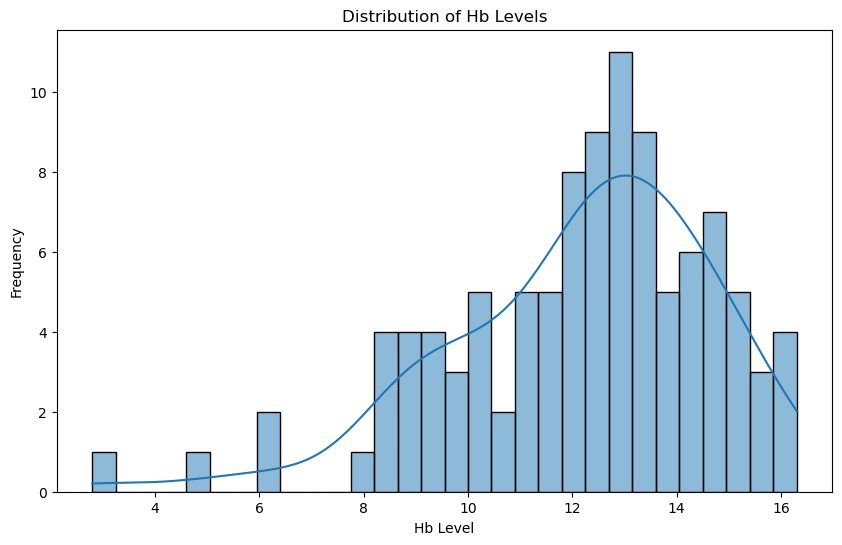

In [25]:
# Plot the distribution of Hb levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Hb'], kde=True, bins=30)
plt.title('Distribution of Hb Levels')
plt.xlabel('Hb Level')
plt.ylabel('Frequency')
plt.show()

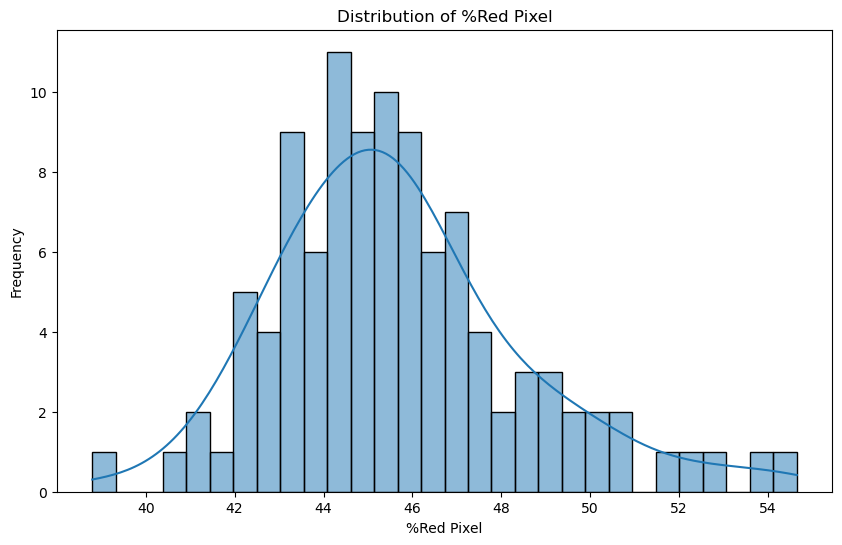

In [27]:
# Plot the distribution of %Red Pixel
plt.figure(figsize=(10, 6))
sns.histplot(df['%Red Pixel'], kde=True, bins=30)
plt.title('Distribution of %Red Pixel')
plt.xlabel('%Red Pixel')
plt.ylabel('Frequency')
plt.show()

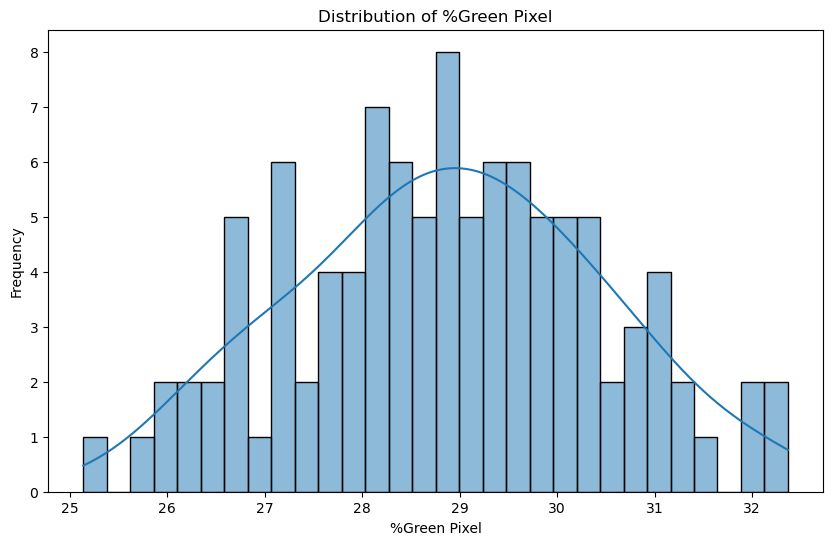

In [29]:
# Plot the distribution of %Green Pixel
plt.figure(figsize=(10, 6))
sns.histplot(df['%Green pixel'], kde=True, bins=30)
plt.title('Distribution of %Green Pixel')
plt.xlabel('%Green Pixel')
plt.ylabel('Frequency')
plt.show()

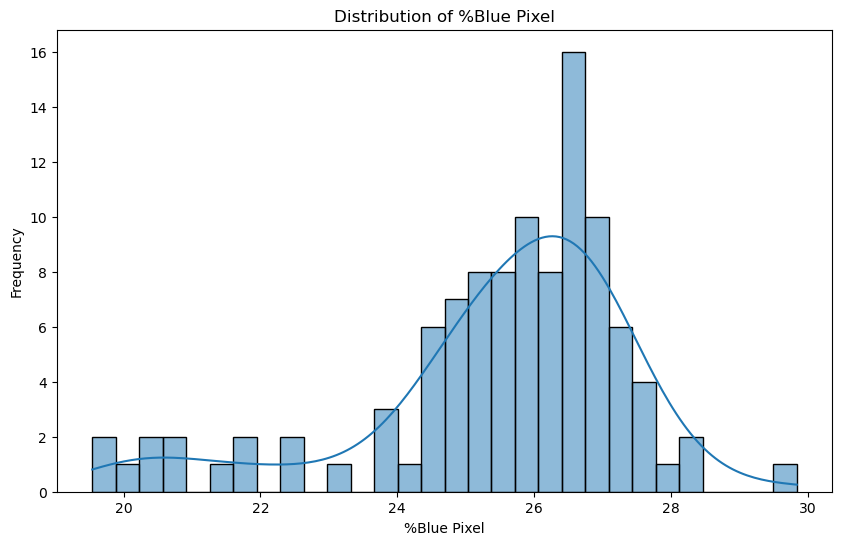

In [31]:
# Plot the distribution of %Blue Pixel
plt.figure(figsize=(10, 6))
sns.histplot(df['%Blue pixel'], kde=True, bins=30)
plt.title('Distribution of %Blue Pixel')
plt.xlabel('%Blue Pixel')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap

Let's see how the numeric features correlate with each other and with the target variable (Anaemic).

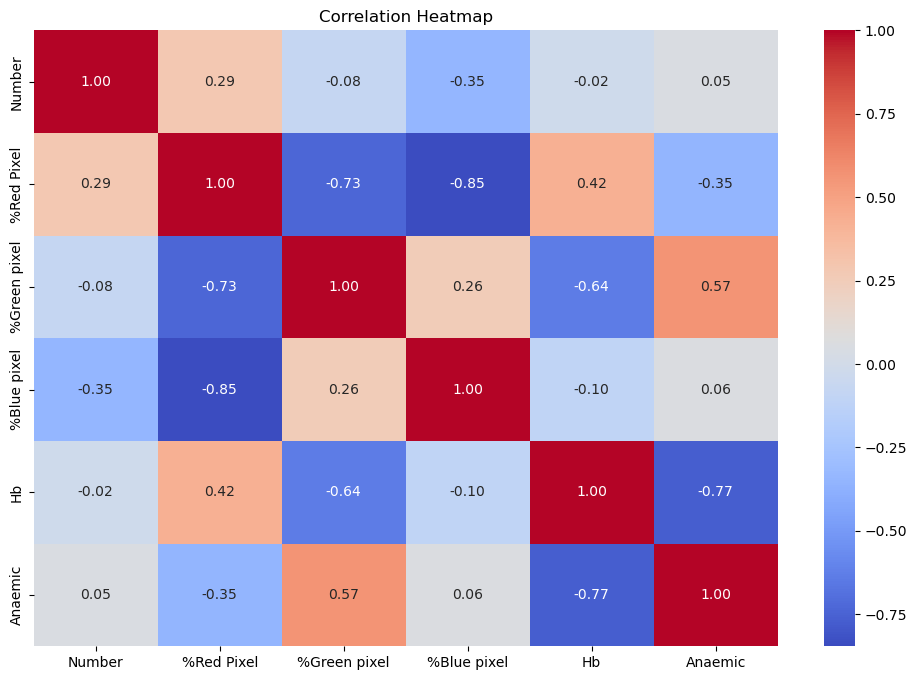

In [33]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Building a Predictor

Based on our exploration, it seems feasible to build a model to predict whether a person is anaemic. Let's proceed with creating a logistic regression model.

In [ ]:
# Convert categorical 'Sex' column to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['Number', 'Anaemic'])
y = df['Anaemic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

## Conclusion and Future Work

In this notebook, we explored a dataset related to anaemia and built a logistic regression model to predict whether a person is anaemic based on various blood parameters. Our model's performance can be further improved with more advanced techniques and hyperparameter tuning.

### Future Analysis Ideas
- Explore other machine learning algorithms (e.g., Random Forest, SVM) to improve prediction accuracy.
- Perform feature engineering to create new features that might be more predictive.
- Investigate the impact of demographic factors (e.g., age, ethnicity) on anaemia prediction.

What do you think would be useful to explore next? Let me know in the comments!

If you found this notebook helpful, please upvote it!

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)